# I. Kütüphanelerin yüklenmesi ve başlangıç düzenlemeleri

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
df = pd.read_csv("/Users/sinif3-22/Downloads/Train_Dataset.csv")
df_al = df.copy()

# Kütüphanelerimizi yükledik
# Uyarıları görmezden gelmesi için filtre uyguladık
# Veri setimizde encoding işlemleri yapıldığında oluşacak sütunlar için sütun limitini kaldırdık
# Veri setimizi çektik
# Veri setimizi kopyaladık. İşlemlerimiz daha hızlı gerçekleşmesi için kopyalama işlemini kullandık

# II. Veri setinin ön incelemesi

In [ ]:
df_al.head()
# Veri setimizi çağırarak göz attık

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0       12142509          6750        0.0         0.0          1.0        0.0   
1       12138936         20250        1.0         0.0          1.0        NaN   
2       12181264         18000        0.0         0.0          1.0        0.0   
3       12188929         15750        0.0         0.0          1.0        1.0   
4       12133385         33750        1.0         0.0          1.0        0.0   
...          ...           ...        ...         ...          ...        ...   
121851  12207714         29250        0.0         0.0          NaN        1.0   
121852  12173765         15750        0.0         1.0          1.0        0.0   
121853  12103937          8100        0.0         1.0          0.0        1.0   
121854  12170623         38250        1.0         1.0          0.0        1.0   
121855  12105610          9000        1.0         1.0          1.0        1.0   

        Child_Count Credit_Amount Loan_Annuity Accompany_Client  \
0               0.0      61190.55      3416.85            Alone   
1               0.0         15282      1826.55            Alone   
2               1.0      59527.35       2788.2            Alone   
3               0.0       53870.4      2295.45            Alone   
4               2.0      133988.4      3547.35            Alone   
...             ...           ...          ...              ...   
121851          0.0        107820       3165.3         Relative   
121852          0.0        104256      3388.05            Alone   
121853          1.0       55107.9      2989.35            Alone   
121854          0.0         45000      2719.35            Alone   
121855          1.0      62428.95      4201.65            Alone   

       Client_Income_Type    Client_Education Client_Marital_Status  \
0              Commercial           Secondary                     M   
1                 Service          Graduation                     M   
2                 Service  Graduation dropout                     W   
3                 Retired           Secondary                     M   
4              Commercial           Secondary                     M   
...                   ...                 ...                   ...   
121851            Service           Secondary                     M   
121852         Commercial          Graduation                     M   
121853           Govt Job           Secondary                     M   
121854            Service          Graduation                     M   
121855         Commercial           Secondary                     S   

       Client_Gender Loan_Contract_Type Client_Housing_Type  \
0               Male                 CL                Home   
1               Male                 CL                Home   
2               Male                 CL              Family   
3               Male                 CL                Home   
4             Female                 CL                Home   
...              ...                ...                 ...   
121851        Female                 CL                Home   
121852        Female                 CL                Home   
121853          Male                 CL                Home   
121854        Female                 CL                Home   
121855          Male                 CL                Home   

       Population_Region_Relative Age_Days Employed_Days Registration_Days  \
0                        0.028663    13957          1062              6123   
1                        0.008575    14162          4129              7833   
2                          0.0228    16790          5102               NaN   
3                        0.010556    23195        365243               NaN   
4                        0.020713    11366          2977              5516   
...                           ...      ...           ...               ...   
121851                   0.031329  12889.0        2863.0            2661.0   
12

In [ ]:
df_al.drop("ID",axis=1,inplace=True)
# Veri setimizde kuracağımız model için ilgisi olmayan sütunun veri setinden kaldırma işlemini gerçekleştirdik

In [ ]:
df_al.info()
# Veri setimizle ilgili bilgileri öğrenebilmek için ekrana yazdırdık

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118249 non-null  object 
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118224 non-null  object 
 7   Loan_Annuity                117044 non-null  object 
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [ ]:
df_al.isnull().mean()*100
# Veri setimizde yüzdesel olarak ilgili sütunların ne kadar boş olduğunu yazdırdık

Client_Income                  2.960051
Car_Owned                      2.938715
Bike_Owned                     2.974002
Active_Loan                    2.983029
House_Own                      3.004366
Child_Count                    2.985491
Credit_Amount                  2.980567
Loan_Annuity                   3.948923
Accompany_Client               1.432839
Client_Income_Type             3.037191
Client_Education               2.991236
Client_Marital_Status          2.850085
Client_Gender                  1.980206
Loan_Contract_Type             2.996159
Client_Housing_Type            3.025702
Population_Region_Relative     3.985852
Age_Days                       2.954307
Employed_Days                  2.994518
Registration_Days              2.965796
ID_Days                        4.897584
Own_House_Age                 65.729221
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000
Client_Occupation             34.003250


In [ ]:
object_sutunlar = df_al.select_dtypes(include="object").columns
for col in object_sutunlar:
    print(df_al[col].value_counts())
    print("------------------")

# Modelimizi kurabilmemiz için sayısal verilere ihtiyacımız var
# Bunun için veri setimizde sayısal olmayan sütunların bilgisini yazdırdık

13500       11908
11250       10302
15750        8719
18000        8215
9000         7577
            ...  
13005.0         1
11835.0         1
25026.3         1
12285.0         1
12840.75        1
Name: Client_Income, Length: 1516, dtype: int64
------------------
45000.0      2513
67500.0      2340
22500.0      2090
27000.0      1865
18000.0      1847
             ... 
126149.85       1
41040           1
201213.9        1
71174.7         1
135534.6        1
Name: Credit_Amount, Length: 6816, dtype: int64
------------------
900        1885
1350       1684
675         682
1012.5      622
3780        504
           ... 
6178.95       1
1148.4        1
2736.9        1
1109.7        1
2989.35       1
Name: Loan_Annuity, Length: 16680, dtype: int64
------------------
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: Accompany_Client, dtype: int64
------------------
Service            61028
Commercial         2

# III. İlgisiz verilerin belirlenmesi, replace ve drop işlemleri

In [ ]:
df_al.Accompany_Client = df_al.Accompany_Client.replace('#','').replace('',np.nan)

# Veri setimizde Accompany Client sütunuyla ilgili bilgileri yazdırdığımızda ilgisiz verileri boş olarak değiştirdik

In [ ]:
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('@','').replace('',np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('#','').replace('',np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.astype(float)

# Veri setimizde Population_Region_Relative sütunuyla ilgili ilgisiz verileri boş olarak değiştirdik
# İlgilendiğimiz sütunun veri girişlerine baktığımızda sayısal veri olarak girildiğini ama sayısal olmayan veri tipi olarak kaydedildiğini gördük
# Sütunumuzun sayısal veriye dönüştürülmesi için ilgili kodumuzu yazarak sayısal bir sütun haline çevirdik

In [ ]:
for value in df_al["Client_Income"]:
    if pd.notnull(value) and value<'0':
        print(value)

# Client Income sütunumuz içinde ilgisiz veri olup olmadığını sorgulamak için bir döngü kurduk ve ekrana yazdırdık

$
$
$
$
$


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
df_al.Client_Income = df_al.Client_Income.replace('$', '').replace('', np.nan)
df_al.Client_Income = df_al.Client_Income.astype(float)

# Ekrana yazılan ilgisiz verileri boş değer olarak değiştirdik

In [ ]:
for value in df_al["Credit_Amount"]:
    if pd.notnull(value) and value<'0':
        print(value)

# Credit Amount sütunumuz içinde ilgisiz veri olup olmadığını sorgulamak için bir döngü kurduk ve ekrana yazdırdık

$
$


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
df_al.Credit_Amount = df_al.Credit_Amount.replace('$', '').replace('', np.nan)
df_al.Credit_Amount = df_al.Credit_Amount.astype(float)

# Credit Amount sütununda ilgisiz verileri boş değer olarak değiştirdik
# Credit Amount sütunu "object" olarak tanımlandığı için içerisinde bulunan verilere bakılarak veri tipini sayısal olarak değiştirdik

In [ ]:
for value in df_al["Loan_Annuity"]:
    if pd.notnull(value) and value<'0':
        print(value)

# Loan Annuity sütunumuz içinde ilgisiz veri olup olmadığını sorgulamak için bir döngü kurduk ve ekrana yazdırdık

$
#VALUE!
#VALUE!
#VALUE!
#VALUE!


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
df_al.Loan_Annuity = df_al.Loan_Annuity.replace('$', '').replace('', np.nan)
df_al.Loan_Annuity = df_al.Loan_Annuity.replace('#VALUE!', '').replace('', np.nan)
df_al.Loan_Annuity = df_al.Loan_Annuity.astype(float)

# Loan Annuity sütununda ilgisiz verileri boş değer olarak değiştirdik
# Loan Annuity sütunu nesne sütunu olarak tanımlandığı için içerisinde bulunan verilere bakılarak veri tipini sayısal olarak değiştirdik

In [ ]:
for value in df_al["Accompany_Client"]:
    if pd.notnull(value) and value<'0':
        print(value)

df_al.Accompany_Client = df_al.Accompany_Client.replace('##', '').replace('', np.nan)
df_al.Accompany_Client.value_counts()

# Accompany Client sütunumuz içinde ilgisiz veri olup olmadığını sorgulamak için bir döngü kurduk ve ekrana yazdırdık
# Son olarak ilgili sütunumuzda yer alan verilerin değerlerini ekrana yazdırarak kontrol ettik

##
##
##
##
##
##
##
##
##
##
##
##


Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
Name: Accompany_Client, dtype: int64

In [ ]:
for value in df_al["Client_Gender"]:
    if pd.notnull(value) and value!='Male' and value!='Female':
        print(value)

df_al.Client_Gender = df_al.Client_Gender.replace('XNA', '').replace('', np.nan)
df_al.Client_Gender.value_counts()

# Client Gender sütunu için döngü yazarak içerisinde boş olmayan, Erkek ya da Kadın olmayan verileri ekrana yazdırarak ilgisiz verileri bulduk
# Bulduğumuz ilgisiz verileri boş değerle değiştirerek sütunumuzun veri değerlerini ekrana yazdırıp kontrol ettik

XNA
XNA
XNA


Male      78463
Female    40977
Name: Client_Gender, dtype: int64

In [ ]:
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('@', '').replace('', np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('#', '').replace('', np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.astype(float)

# Population_Region_Relative sütununu object olarak döngüyle ekrana yazdırıp değerleri arasında ilgisiz verilerin olduğunu görmüştük
# Döngü kullanmayarak işlemimizi hızlandırıp ilgisiz verileri boş veri olarak değiştirdik
# Sütunumuz verileri sayısal olup veri tipi object olduğu için veri tipini sayısal tipine çevirdik

In [ ]:
df_al.Age_Days = df_al.Age_Days.replace('x', '').replace('', np.nan)
df_al.Age_Days = df_al.Age_Days.astype(float)
# Age_Days sütununda yer alan ilgisiz değerleri boş veri olarak değiştirdik.

In [ ]:
df_al.Employed_Days = df_al.Employed_Days.replace('x', '').replace('', np.nan)
df_al.Employed_Days = df_al.Employed_Days.astype(float)
# Employed_Days sütununda yer alan ilgisiz değerleri boş veri olarak değiştirdik.

In [ ]:
df_al.Registration_Days = df_al.Registration_Days.replace('x', '').replace('', np.nan)
df_al.Registration_Days = df_al.Registration_Days.astype(float)
# Registration_Days sütununda yer alan ilgisiz değerleri boş veri olarak değiştirdik.

In [ ]:
df_al.ID_Days = df_al.ID_Days.replace('x', '').replace('', np.nan)
df_al.ID_Days = df_al.ID_Days.astype(float)
# ID_Days sütununda yer alan ilgisiz değerleri boş veri olarak değiştirdik.

In [ ]:
df_al.Type_Organization = df_al.Type_Organization.replace('XNA', '').replace('', np.nan)
# Type_Organization sütununda yer alan ilgisiz değerleri boş veri olarak değiştirdik.

In [ ]:
df_al.Score_Source_3 = df_al.Score_Source_3.replace('&', '').replace('', np.nan)
df_al.Score_Source_3 = df_al.Score_Source_3.astype(float)
# Score_Source_3 sütununda yer alan ilgisiz değerleri boş veri olarak değiştirdik.

In [ ]:
def fix_value_by_map(current_value, default, value_map):
    if str(current_value) == 'nan':
        return value_map[default]
    else:
        return current_value

# Fonksiyon oluşturup veri ön işlemeyi devam ettirmek için mapping fonksiyonu kurduk

In [ ]:
value_map = df_al.groupby('Default').median()['Client_Income']
df_al['Client_Income'] = df_al.apply(lambda row : fix_value_by_map(row['Client_Income'], row['Default'], value_map), axis=1)

# Kurduğumuz mapping fonksiyonu yardımıyla Client Income sütunundaki verileri doldurmak için bağımlı değişken sütunumuzla gruplayıp median değeriyle doldurduk

In [ ]:
value_map = df_al.groupby(['Client_Income','Default']).mean()['Loan_Annuity']

def get_Loan_Annuity_by_Client_Income_and_Default(loan_annuity, client_income, default, value_map):
    new_loan_annuity = loan_annuity
    if str(new_loan_annuity) == 'nan':
        for key in value_map.keys():
            if default == key[1]:
                if client_income < key[0]:
                    continue
                else:
                    new_loan_annuity = value_map[key]
                    break
            else:
                continue
    return new_loan_annuity

df_al['Loan_Annuity'] = df_al.apply(lambda row :
get_Loan_Annuity_by_Client_Income_and_Default(row['Loan_Annuity'],
                            row['Client_Income'],row['Default'], value_map), axis=1)

# Client Income ve Default sütunlarımıza göre Loan Annuity verilerimizi inceledik.
# Kurduğumuz fonksiyonda boş değerler olup olmadığını kontrol edip Default'taki değerlere göre yeniden indeksleme yaptık.
# Yaptığımız indeksleme sonrası Loan Annuity verilerimizi ortalamayla doldurduk.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_al['Accompany_Client'].fillna(df_al['Accompany_Client'].mode()[0], inplace=True)

encoder = LabelEncoder()
df_al.Accompany_Client = encoder.fit_transform(df_al.Accompany_Client)

In [ ]:
df_al[['Accompany_Client']].value_counts()

Accompany_Client
0                   99167
5                   15748
4                    4516
2                    1334
3                     987
1                     104
dtype: int64

In [ ]:
df_al[['Client_Income_Type']] = df_al[['Client_Income_Type']].fillna("Unknown")

encoder = LabelEncoder()
df_al.Client_Income_Type = encoder.fit_transform(df_al.Client_Income_Type)

In [ ]:
df_al[['Client_Income_Type']].value_counts()

Client_Income_Type
5                     61028
1                     27764
4                     21043
2                      8303
8                      3701
6                         8
7                         6
3                         2
0                         1
dtype: int64

In [ ]:
df_al.Car_Owned.value_counts()

0.0    77724
1.0    40551
Name: Car_Owned, dtype: int64

In [ ]:
df_al[['Car_Owned']] = df_al[['Car_Owned']].fillna(value=1)
df_al.Car_Owned.value_counts()

0.0    77724
1.0    44132
Name: Car_Owned, dtype: int64

In [ ]:
df_al.Bike_Owned.value_counts()

0.0    78948
1.0    39284
Name: Bike_Owned, dtype: int64

In [ ]:
df_al[['Bike_Owned']] = df_al[['Bike_Owned']].fillna(value=1)
df_al.Bike_Owned.value_counts()

0.0    78948
1.0    42908
Name: Bike_Owned, dtype: int64

In [ ]:
df_al.Active_Loan.value_counts()

0.0    59208
1.0    59013
Name: Active_Loan, dtype: int64

In [ ]:
df_al.Active_Loan = df_al.Active_Loan.fillna(value=1)
df_al.Active_Loan.value_counts()

1.0    62648
0.0    59208
Name: Active_Loan, dtype: int64

In [ ]:
df_al.House_Own.value_counts()

1.0    81798
0.0    36397
Name: House_Own, dtype: int64

In [ ]:
df_al.House_Own = df_al.House_Own.fillna(value=0)
df_al.House_Own.value_counts()

1.0    81798
0.0    40058
Name: House_Own, dtype: int64

In [ ]:
df_al.Child_Count.value_counts()

0.0     82834
1.0     23431
2.0     10294
3.0      1430
4.0       167
5.0        34
6.0        12
7.0         4
14.0        4
10.0        3
8.0         2
19.0        1
12.0        1
9.0         1
Name: Child_Count, dtype: int64

In [ ]:
df_al['Child_Count'].fillna(df_al['Child_Count'].mode()[0], inplace=True)
df_al.Child_Count.value_counts()

0.0     86472
1.0     23431
2.0     10294
3.0      1430
4.0       167
5.0        34
6.0        12
7.0         4
14.0        4
10.0        3
8.0         2
19.0        1
12.0        1
9.0         1
Name: Child_Count, dtype: int64

In [ ]:
df_al.Client_Education.value_counts()

Secondary             83911
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: Client_Education, dtype: int64

In [ ]:
df_al['Client_Education'].fillna(df_al['Client_Education'].mode()[0], inplace=True)

encoder = LabelEncoder()
df_al.Client_Education = encoder.fit_transform(df_al.Client_Education)
df_al.Client_Education.value_counts()

4    87556
0    28819
1     3960
2     1455
3       66
Name: Client_Education, dtype: int64

In [ ]:
df_al.Client_Marital_Status.value_counts()

M    87349
S    17404
D     7556
W     6074
Name: Client_Marital_Status, dtype: int64

In [ ]:
df_al[['Client_Marital_Status']] = df_al[['Client_Marital_Status']].fillna(value='Other')

encoder = LabelEncoder()
df_al.Client_Marital_Status = encoder.fit_transform(df_al.Client_Marital_Status)
df_al.Client_Marital_Status.value_counts()

1    87349
3    17404
0     7556
4     6074
2     3473
Name: Client_Marital_Status, dtype: int64

In [ ]:
df_al.Client_Gender.value_counts()

Male      78463
Female    40977
Name: Client_Gender, dtype: int64

In [ ]:
df_al[['Client_Gender']] = df_al[['Client_Gender']].fillna(value='Unknown')

encoder = LabelEncoder()
df_al.Client_Gender = encoder.fit_transform(df_al.Client_Gender)
df_al.Client_Gender.value_counts()

1    78463
0    40977
2     2416
Name: Client_Gender, dtype: int64

In [ ]:
df_al.Loan_Contract_Type.value_counts()

CL    107118
RL     11087
Name: Loan_Contract_Type, dtype: int64

In [ ]:
df_al[['Loan_Contract_Type']] = df_al[['Loan_Contract_Type']].fillna(value='Other')

encoder = LabelEncoder()
df_al.Loan_Contract_Type = encoder.fit_transform(df_al.Loan_Contract_Type)
df_al.Loan_Contract_Type.value_counts()

0    107118
2     11087
1      3651
Name: Loan_Contract_Type, dtype: int64

In [ ]:
df_al.Client_Housing_Type.value_counts()

Home         104870
Family         5783
Municipal      4248
Rental         1816
Office         1002
Shared          450
Name: Client_Housing_Type, dtype: int64

In [ ]:
df_al[['Client_Housing_Type']] = df_al[['Client_Housing_Type']].fillna(value='Other')

encoder = LabelEncoder()
df_al.Client_Housing_Type = encoder.fit_transform(df_al.Client_Housing_Type)
df_al.Client_Housing_Type.value_counts()

1    104870
0      5783
2      4248
4      3687
5      1816
3      1002
6       450
Name: Client_Housing_Type, dtype: int64

In [ ]:
value_map = df_al.groupby('Default').median()['Age_Days']
df_al['Age_Days'] = df_al.apply(lambda row : fix_value_by_map(row['Age_Days'], row['Default'], value_map), axis=1)

In [ ]:
value_map = df_al.groupby('Default').median()['Employed_Days']
df_al['Employed_Days'] = df_al.apply(lambda row : fix_value_by_map(row['Employed_Days'], row['Default'], value_map), axis=1)

In [ ]:
value_map = df_al.groupby('Default').median()['Registration_Days']
df_al['Registration_Days'] = df_al.apply(lambda row : fix_value_by_map(row['Registration_Days'], row['Default'], value_map), axis=1)

In [ ]:
value_map = df_al.groupby('Default').median()['ID_Days']
df_al['ID_Days'] = df_al.apply(lambda row : fix_value_by_map(row['ID_Days'], row['Default'], value_map), axis=1)

In [ ]:
df_al.Client_Occupation.value_counts()

Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: Client_Occupation, dtype: int64

In [ ]:
df_al['Client_Occupation'].fillna(value='Other')

encoder = LabelEncoder()
df_al.Client_Occupation = encoder.fit_transform(df_al.Client_Occupation)
df_al.Client_Occupation.value_counts()

18    41435
8     21024
14    12136
3     10611
10     8099
4      7150
6      4317
0      3766
11     3172
16     2683
2      2224
1      1722
12     1006
9       787
15      531
17      511
13      280
5       206
7       196
Name: Client_Occupation, dtype: int64

In [ ]:
encoder = LabelEncoder()
df_al.Client_Permanent_Match_Tag = encoder.fit_transform(df_al.Client_Permanent_Match_Tag)
df_al.Client_Permanent_Match_Tag.unique()

array([1, 0])

In [ ]:
df_al.Client_Family_Members.value_counts()

2.0     61652
1.0     26213
3.0     20434
4.0      9583
5.0      1349
6.0       157
7.0        32
8.0        11
9.0         4
10.0        3
12.0        3
16.0        2
13.0        1
14.0        1
15.0        1
Name: Client_Family_Members, dtype: int64

In [ ]:
df_al.Client_Family_Members.fillna(value=0.0,inplace=True)

In [ ]:
df_al.drop('Own_House_Age',axis=1,inplace=True)

In [ ]:
value_map = df_al.groupby('Default').median()['Credit_Amount']
df_al['Credit_Amount'] = df_al.apply(lambda row : fix_value_by_map(row['Credit_Amount'], row['Default'], value_map), axis=1)

In [ ]:
value_map = df_al.groupby('Default').median()['Cleint_City_Rating']
df_al['Cleint_City_Rating'] = df_al.apply(lambda row : fix_value_by_map(row['Cleint_City_Rating'], row['Default'], value_map), axis=1)

In [ ]:
value_map = df_al.groupby('Default').median()['Application_Process_Day']
df_al['Application_Process_Day'] = df_al.apply(lambda row : fix_value_by_map(row['Application_Process_Day'], row['Default'], value_map), axis=1)

In [ ]:
value_map = df_al.groupby('Default').median()['Application_Process_Hour']
df_al['Application_Process_Hour'] = df_al.apply(lambda row : fix_value_by_map(row['Application_Process_Hour'], row['Default'], value_map), axis=1)

In [ ]:
encoder = LabelEncoder()
df_al.Client_Contact_Work_Tag = encoder.fit_transform(df_al.Client_Contact_Work_Tag)
df_al.Client_Contact_Work_Tag.value_counts()

1    100015
0     21841
Name: Client_Contact_Work_Tag, dtype: int64

In [ ]:
df_al.Type_Organization.unique()

def get_sector(organization_plus_type_value):
    return str(organization_plus_type_value).lower().split('type')[0]

def get_sector_type(organization_plus_type_value):
    try:
        return int(str(organization_plus_type_value).lower().split('type')[1])
    except:
        return 0

In [ ]:
df_al['Employment_Sector'] = df_al.apply(lambda row : get_sector(row['Type_Organization']), axis=1)
df_al['Employment_Sector_Type'] = df_al.apply(lambda row : get_sector_type(row['Type_Organization']), axis=1)
df_al.drop(['Type_Organization'], inplace=True, axis=1)

In [ ]:
encoder = LabelEncoder()
df_al['Employment_Sector'] = encoder.fit_transform(df_al['Employment_Sector'])

In [ ]:
value_map = df_al.groupby('Default').median()['Score_Source_1']
df_al['Score_Source_1'] = df_al.apply(lambda row : fix_value_by_map(row['Score_Source_1'], row['Default'], value_map), axis=1)

In [ ]:
value_map = df_al.groupby('Default').median()['Score_Source_2']
df_al['Score_Source_2'] = df_al.apply(lambda row : fix_value_by_map(row['Score_Source_2'], row['Default'], value_map), axis=1)

In [ ]:
value_map = df_al.groupby('Default').median()['Score_Source_3']
df_al['Score_Source_3'] = df_al.apply(lambda row : fix_value_by_map(row['Score_Source_3'], row['Default'], value_map), axis=1)

In [ ]:
value_map = df_al.groupby('Default').mean()['Social_Circle_Default']
df_al['Social_Circle_Default'] = df_al.apply(lambda row : fix_value_by_map(row['Social_Circle_Default'], row['Default'], value_map), axis=1)

In [ ]:
value_map = df_al.groupby('Default').median()['Phone_Change']
df_al['Phone_Change'] = df_al.apply(lambda row : fix_value_by_map(row['Phone_Change'], row['Default'], value_map), axis=1)

In [ ]:
value_map = df_al.groupby('Default').median()['Credit_Bureau']
df_al['Credit_Bureau'] = df_al.apply(lambda row : fix_value_by_map(row['Credit_Bureau'], row['Default'], value_map), axis=1)

In [ ]:
df_al.dtypes

Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client                int64
Client_Income_Type              int64
Client_Education                int64
Client_Marital_Status           int64
Client_Gender                   int64
Loan_Contract_Type              int64
Client_Housing_Type             int64
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation               int64
Client_Family_Members         float64
Cleint_City_Rating            float64
Application_

In [ ]:
df_al.isnull().sum()

Client_Income                    0
Car_Owned                        0
Bike_Owned                       0
Active_Loan                      0
House_Own                        0
Child_Count                      0
Credit_Amount                    0
Loan_Annuity                     0
Accompany_Client                 0
Client_Income_Type               0
Client_Education                 0
Client_Marital_Status            0
Client_Gender                    0
Loan_Contract_Type               0
Client_Housing_Type              0
Population_Region_Relative    4868
Age_Days                         0
Employed_Days                    0
Registration_Days                0
ID_Days                          0
Mobile_Tag                       0
Homephone_Tag                    0
Workphone_Working                0
Client_Occupation                0
Client_Family_Members            0
Cleint_City_Rating               0
Application_Process_Day          0
Application_Process_Hour         0
Client_Permanent_Mat

In [ ]:
df_al.Population_Region_Relative.info()

<class 'pandas.core.series.Series'>
RangeIndex: 121856 entries, 0 to 121855
Series name: Population_Region_Relative
Non-Null Count   Dtype  
--------------   -----  
116988 non-null  float64
dtypes: float64(1)
memory usage: 952.1 KB


In [ ]:
encoder = LabelEncoder()
df_al.Population_Region_Relative = encoder.fit_transform(df_al.Population_Region_Relative)

In [ ]:
df_al.isnull().sum()

# Tüm veri ön işleme işlemlerimizi bitirdikten sonra veri setimizde boş değer olup olmadığını tekrar kontrol ettik

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Score_Source_1                0
Score_So

In [ ]:
df_al.corr()

Client_Income  Car_Owned  Bike_Owned  Active_Loan  \
Client_Income                    1.000000   0.163765   -0.003419     0.000757   
Car_Owned                        0.163765   1.000000   -0.000278    -0.000988   
Bike_Owned                      -0.003419  -0.000278    1.000000     0.001009   
Active_Loan                      0.000757  -0.000988    0.001009     1.000000   
House_Own                        0.003915  -0.007683    0.002277    -0.006067   
Child_Count                      0.025248   0.094539    0.002432     0.001875   
Credit_Amount                    0.317617   0.108568    0.005380    -0.000174   
Loan_Annuity                     0.375862   0.127780   -0.000109    -0.001377   
Accompany_Client                -0.023583   0.014031    0.003589    -0.003295   
Client_Income_Type              -0.137117  -0.025442   -0.003284    -0.000270   
Client_Education                -0.194459  -0.085660    0.005213    -0.000867   
Client_Marital_Status           -0.032606  -0.099567   -0.005278     0.003853   
Client_Gender                   -0.141644  -0.306896    0.004351     0.007522   
Loan_Contract_Type              -0.000246   0.000898    0.005511     0.003557   
Client_Housing_Type              0.007525  -0.007499    0.000331    -0.002791   
Population_Region_Relative       0.044986   0.032270    0.000260     0.001452   
Age_Days                        -0.050740  -0.124305   -0.000974     0.000686   
Employed_Days                   -0.128616  -0.150496   -0.001973     0.003330   
Registration_Days               -0.057440  -0.077541   -0.004558    -0.001092   
ID_Days                         -0.023257  -0.013520    0.000063     0.001669   
Mobile_Tag                       0.001059  -0.003802   -0.003886     0.002947   
Homephone_Tag                   -0.039027   0.010217   -0.001245     0.001646   
Workphone_Working                0.001233  -0.007214   -0.004806     0.000743   
Client_Occupation               -0.077694  -0.114958   -0.001862     0.003783   
Client_Family_Members            0.025889   0.134581    0.003162     0.000170   
Cleint_City_Rating              -0.187891  -0.021110   -0.001184    -0.001731   
Application_Process_Day         -0.001762  -0.003971   -0.003713     0.002142   
Application_Process_Hour         0.076073   0.011827    0.002536     0.003713   
Client_Permanent_Match_Tag      -0.006968  -0.002107   -0.000345     0.005520   
Client_Contact_Work_Tag         -0.015740  -0.085247   -0.004674     0.003972   
Score_Source_1                   0.053696  -0.032711   -0.004545    -0.000729   
Score_Source_2                   0.034339   0.015213    0.001111     0.000037   
Score_Source_3                  -0.054860  -0.006731   -0.004373     0.002598   
Social_Circle_Default            0.068677   0.017920   -0.003246     0.005007   
Phone_Change                     0.039476   0.033858   -0.005255     0.008002   
Credit_Bureau                    0.031048  -0.025840   -0.001696     0.008067   
Default                         -0.022056  -0.022525    0.002104     0.000394   
Employment_Sector               -0.059951  -0.042639   -0.006704    -0.002319   
Employment_Sector_Type           0.071849   0.073882   -0.001563    -0.000379   

                            House_Own  Child_Count  Credit_Amount  \
Client_Income                0.003915     0.025248       0.317617   
Car_Owned                   -0.007683     0.094539       0.108568   
Bike_Owned                   0.002277     0.002432       0.005380   
Active_Loan                 -0.006067     0.001875      -0.000174   
House_Own                    1.000000    -0.003275      -0.036806   
Child_Count                 -0.003275     1.000000      -0.001456   
Credit_Amount               -0.036806    -0.001456       1.000000   
Loan_Annuity                -0.002054     0.020723       0.712941   
Accompany_Client             0.049541     0.021676       0.028411   
Client_Income_Type           0.002771     0.002810      -0.092187   
Client_Education            

In [ ]:
df_al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               121856 non-null  float64
 1   Car_Owned                   121856 non-null  float64
 2   Bike_Owned                  121856 non-null  float64
 3   Active_Loan                 121856 non-null  float64
 4   House_Own                   121856 non-null  float64
 5   Child_Count                 121856 non-null  float64
 6   Credit_Amount               121856 non-null  float64
 7   Loan_Annuity                121856 non-null  float64
 8   Accompany_Client            121856 non-null  int64  
 9   Client_Income_Type          121856 non-null  int64  
 10  Client_Education            121856 non-null  int64  
 11  Client_Marital_Status       121856 non-null  int64  
 12  Client_Gender               121856 non-null  int64  
 13  Loan_Contract_

# Veri setinin görselleştirilmesi

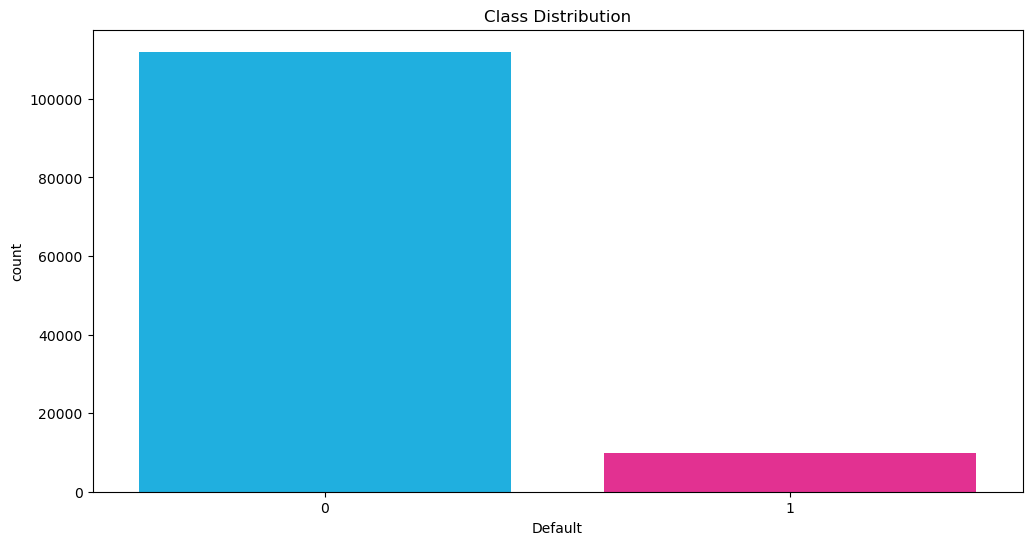

% of no defaults       : 91.92079175420169
Number of no defaults     : 112011
% of defaults         : 8.07920824579832
Number of defaults    : 9845


In [ ]:
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'Default', data = df_al, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Normal_transacation = len(df_al[df_al['Default']==0])
Count_Fraud_transacation = len(df_al[df_al['Default']==1])
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of no defaults       :', Percentage_of_Normal_transacation*100)
print('Number of no defaults     :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

# Görselleştirme yaparak veri setimizde temerrüde düşen ve düşmeyenlerin sayısını ekrana yazdırdık

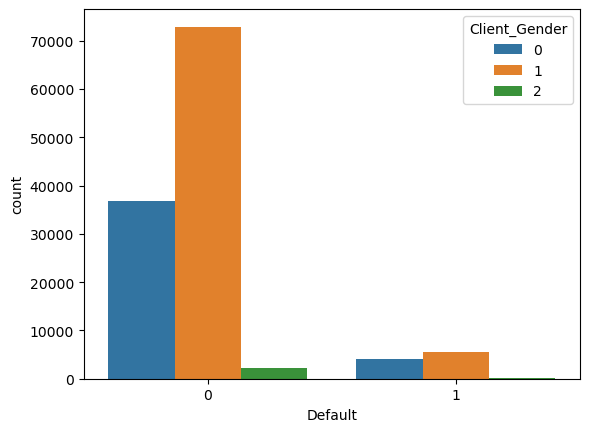

In [ ]:
sns.countplot(data=df_al , x="Default" , hue = "Client_Gender")
plt.show()

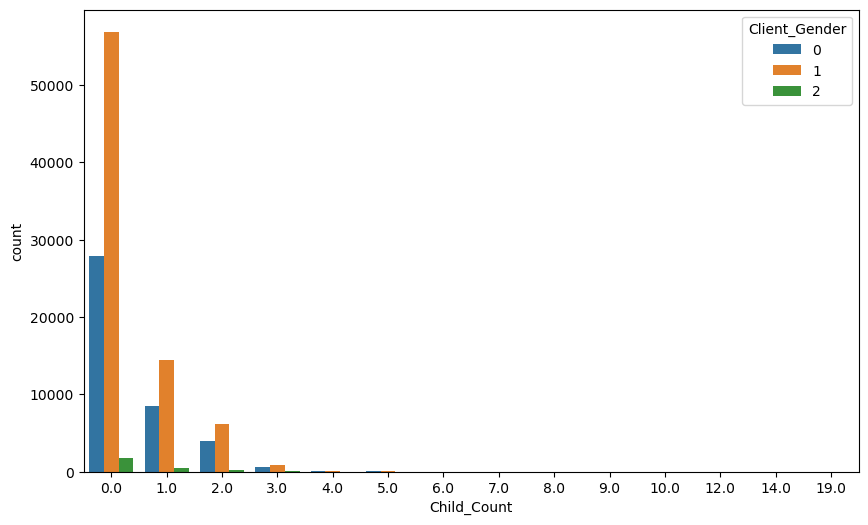

In [ ]:
plt.figure(figsize=(10, 6))

# 10x6 boyutunda bir figür oluşturur

sns.countplot(data=df_al, x="Child_Count", hue="Client_Gender")
plt.show()

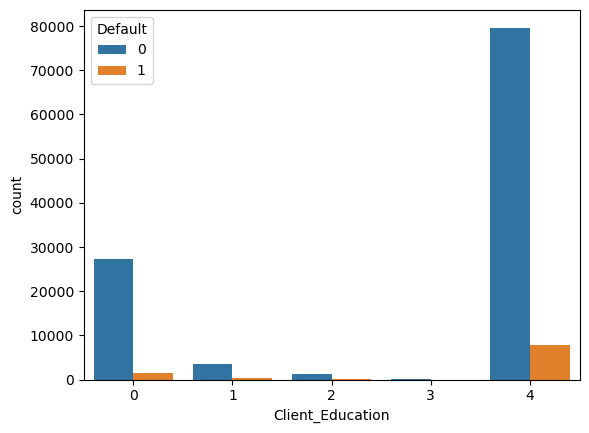

In [ ]:
sns.countplot(data=df_al , x ="Client_Education", hue = "Default")
plt.show()

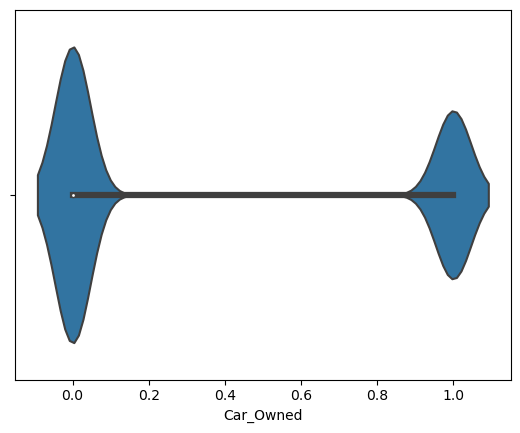

In [ ]:
sns.violinplot(data=df_al , x ="Car_Owned", hue = "Active_Loan")
plt.show()

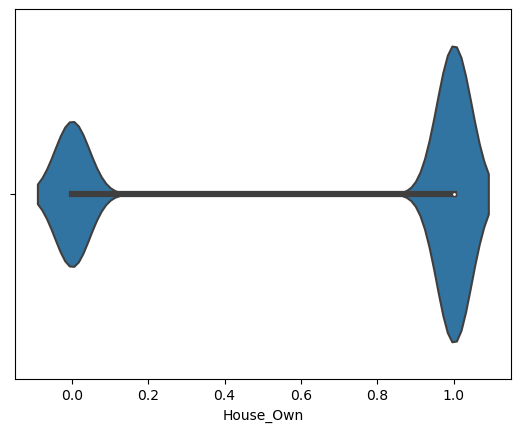

In [ ]:
sns.violinplot(data=df_al , x ="House_Own", hue = "Active_Loan")
plt.show()

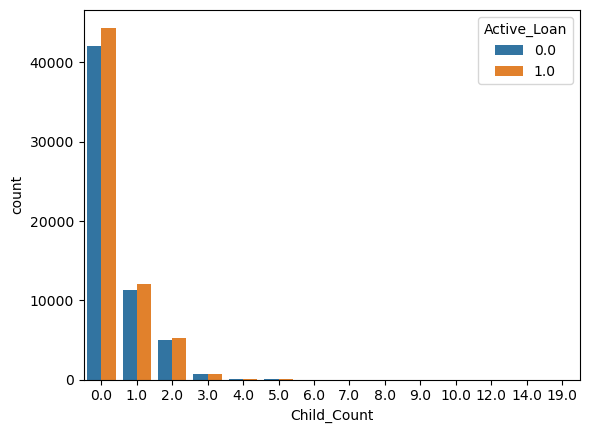

In [ ]:
sns.countplot(data=df_al , x ="Child_Count", hue = "Active_Loan")
plt.show()

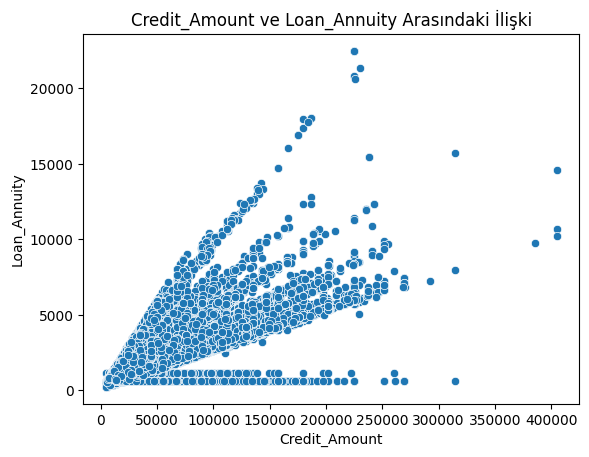

In [ ]:
sns.scatterplot(x='Credit_Amount', y='Loan_Annuity', data=df_al)

plt.title('Credit_Amount ve Loan_Annuity Arasındaki İlişki')
plt.show()

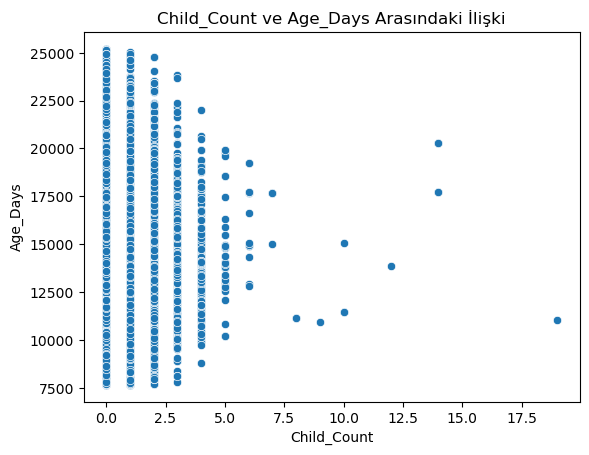

In [ ]:
sns.scatterplot(x='Child_Count', y='Age_Days', data=df_al)

plt.title('Child_Count ve Age_Days Arasındaki İlişki')
plt.show()

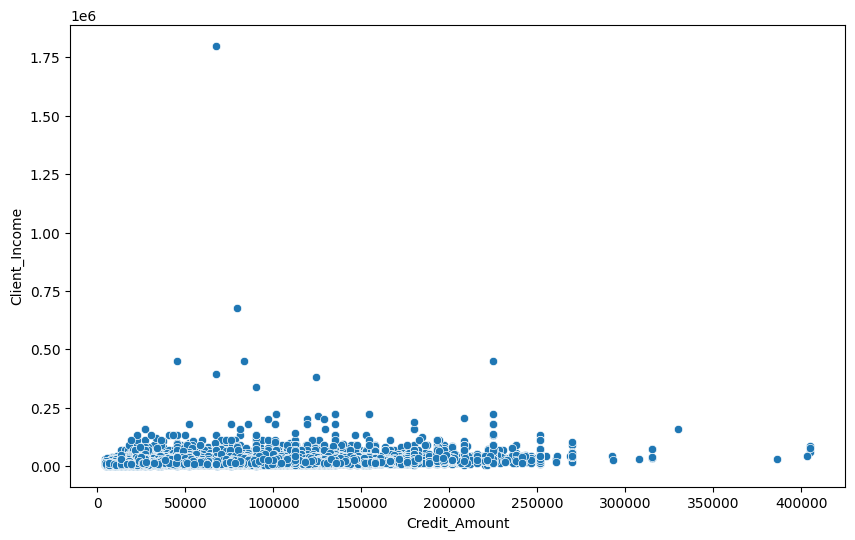

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Credit_Amount', y='Client_Income', data=df_al)


plt.show()

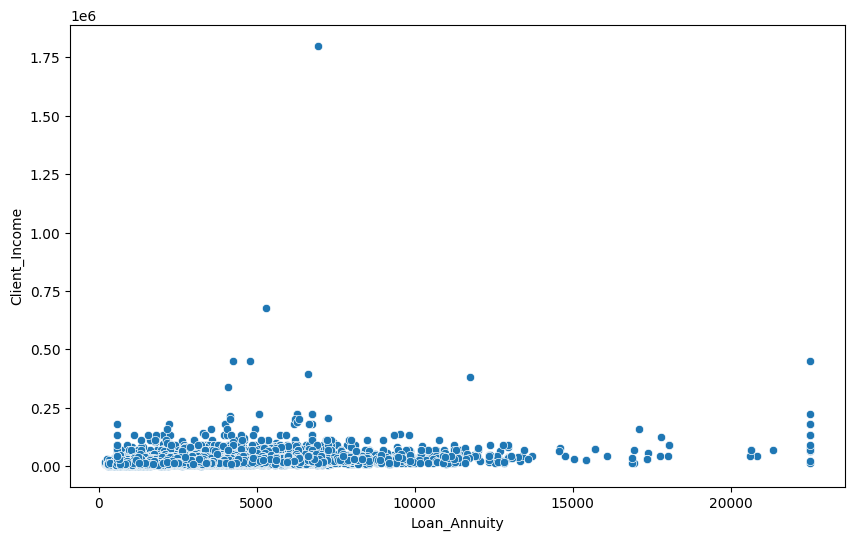

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Loan_Annuity', y='Client_Income', data=df_al)


plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

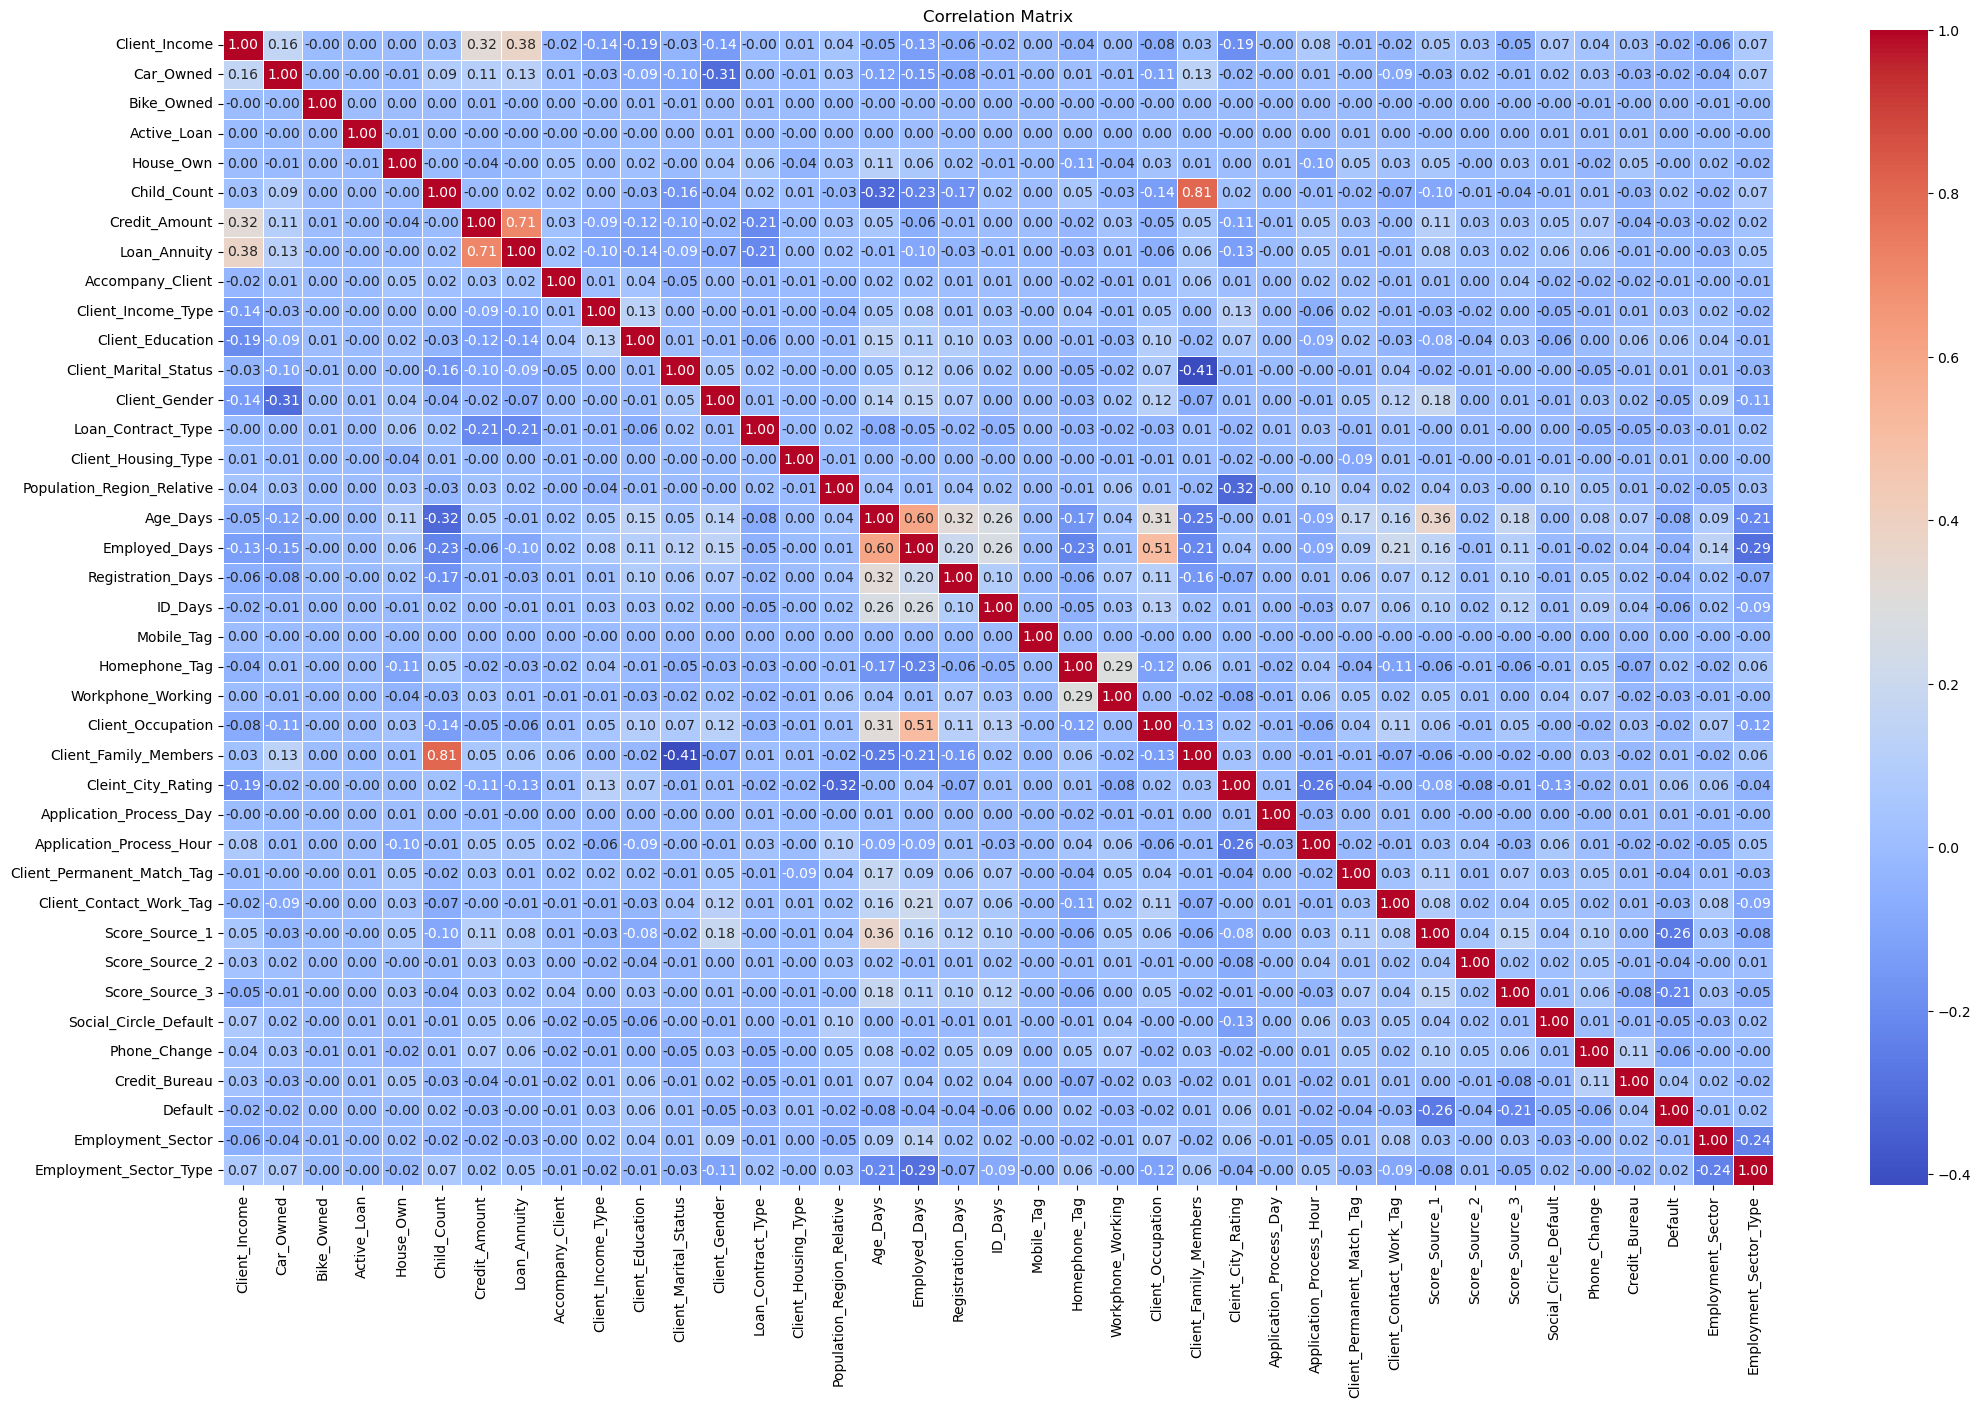

In [ ]:
variables = df_al.columns
data = df_al[variables]
correlation_matrix = data.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

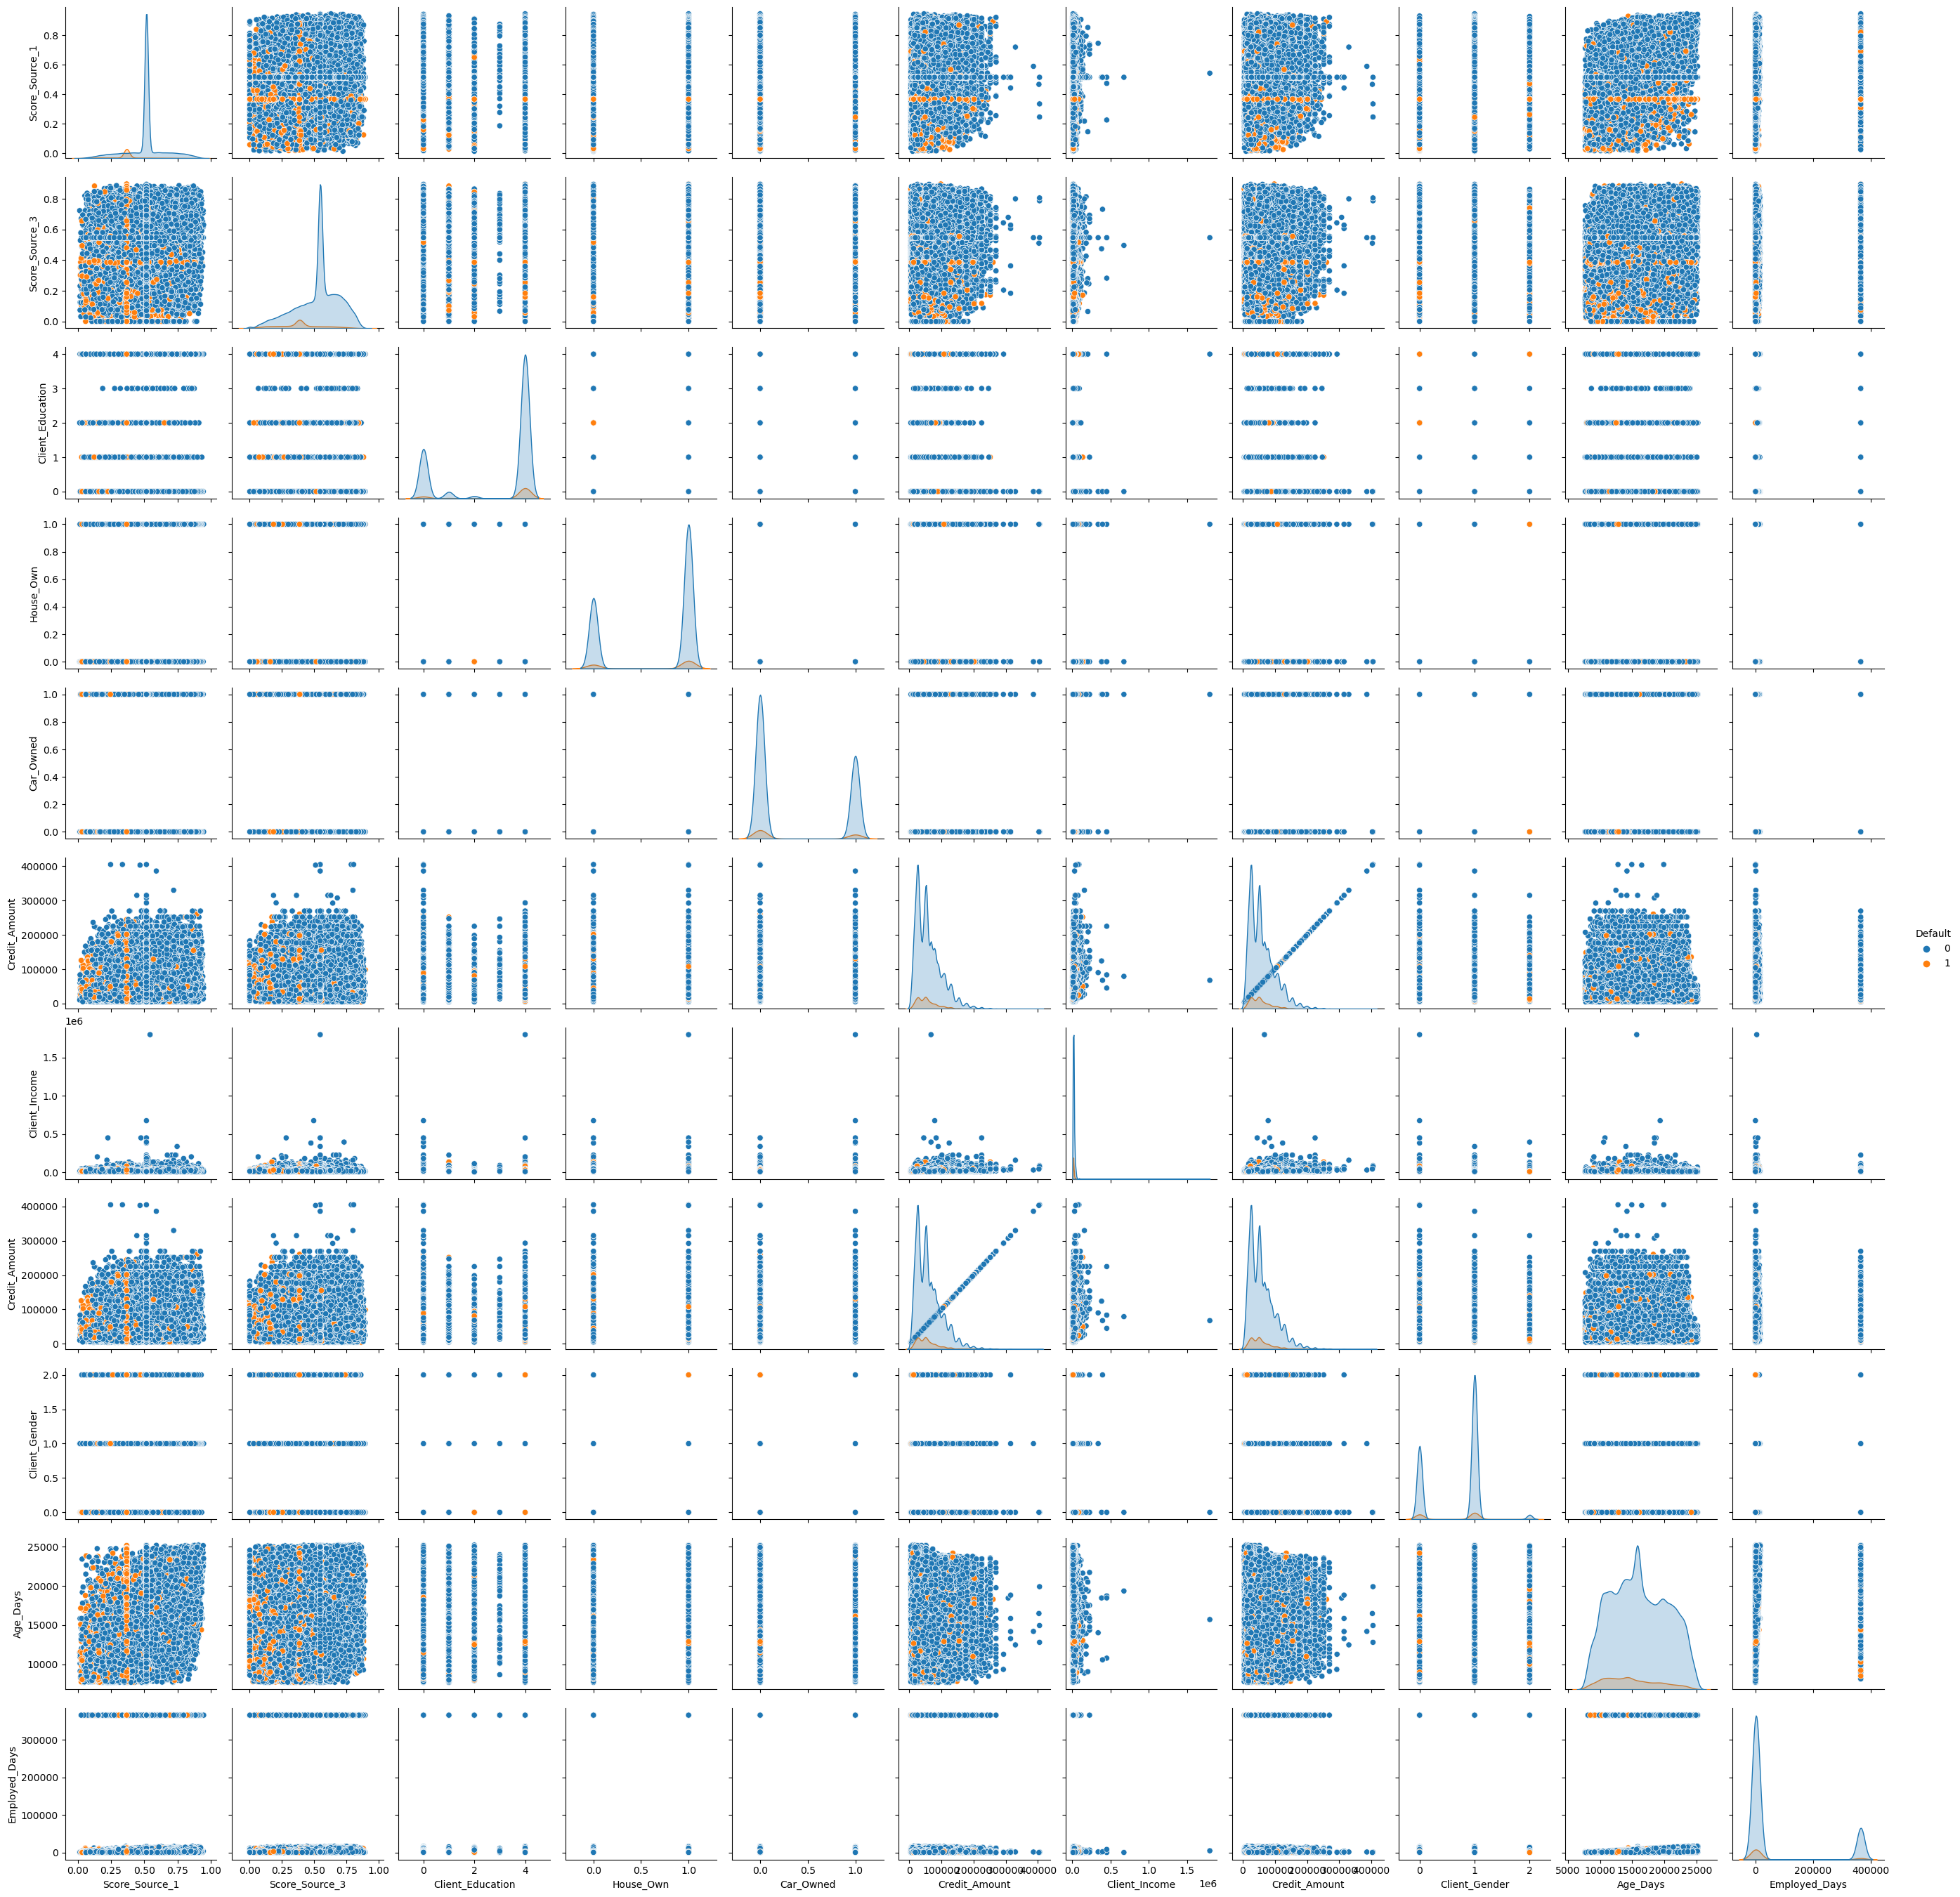

In [ ]:
# Verilerin dağılımları görmek için aşağıdaki görselleştirmeleri oluşturduk (çift yönlü ilişkileri inceler)
sns.pairplot(df_al, hue='Default', vars=['Score_Source_1', 'Score_Source_3', 'Client_Education', 'House_Own', 'Car_Owned', 'Credit_Amount', 'Client_Income', 'Credit_Amount', 'Client_Gender', 'Age_Days', 'Employed_Days'])

# IV. Model başarılarının karşılaştırılması

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

X = df_al.drop('Default', axis=1)
y = df_al['Default']

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


'X' shape: (121856, 38)
'y' shape: (121856,)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

# Veri setimiz için LinearRegression modelini kurduk
# Veri setimizi %80 - %20 olarak böldük
# Böldüğümüz veri setimizde test üzerinde tahminleme yaptık ve skorumuzu bulduk

Mean Squared Error: 0.06570912494105852
R2 Score: 0.10605742951782782


In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mean_error = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print('Mean Squared Error:', ridge_mean_error)
print('R2 Score:', ridge_r2)

# Ridge modelini kurarak LinearRegression modelimiz için daha düzenleştirilmiş modellemeyi kurup tahminleme yaptık

Mean Squared Error: 0.06570912238575086
R2 Score: 0.106057464281619


In [ ]:
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mean_error = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print('Mean Squared Error:', lasso_mean_error)
print('R2 Score:', lasso_r2)

# Ridge modelini kurduğumuz gibi Lasso modelini de kurarak bir diğer düzenleştirme modelimizle birlikte tahminlememizi iyileştirmeyi ve diğer tahminlerimizle karşılaştırmayı hedefledik

Mean Squared Error: 0.0735061422947347
R2 Score: -1.742297018836325e-05


In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

# Linear SVC modelini kurarak değerlere baktık.

Train Result:
Accuracy Score: 91.90%
_______________________________________________
CLASSIFICATION REPORT:
                      0       1  accuracy     macro avg  weighted avg
precision      0.918982     0.0  0.918982      0.459491      0.844527
recall         1.000000     0.0  0.918982      0.500000      0.918982
f1-score       0.957781     0.0  0.918982      0.478890      0.880183
support    89586.000000  7898.0  0.918982  97484.000000  97484.000000
_______________________________________________
Confusion Matrix: 
 [[89586     0]
 [ 7898     0]]

Test Result:
Accuracy Score: 92.01%
_______________________________________________
CLASSIFICATION REPORT:
                      0       1  accuracy     macro avg  weighted avg
precision      0.920113     0.0  0.920113      0.460057      0.846608
recall         1.000000     0.0  0.920113      0.500000      0.920113
f1-score       0.958395     0.0  0.920113      0.479197      0.881832
support    22425.000000  1947.0  0.920113  24372.000000

# V. Logistic Regression uygulaması ve sonuçları

In [ ]:
# Logistic Regression modelimizle classification report'u oluşturduk.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, roc_curve, auc

X = df_al.drop('Default',axis=1)
y = df_al['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print(report)

Text(50.722222222222214, 0.5, 'True Label')

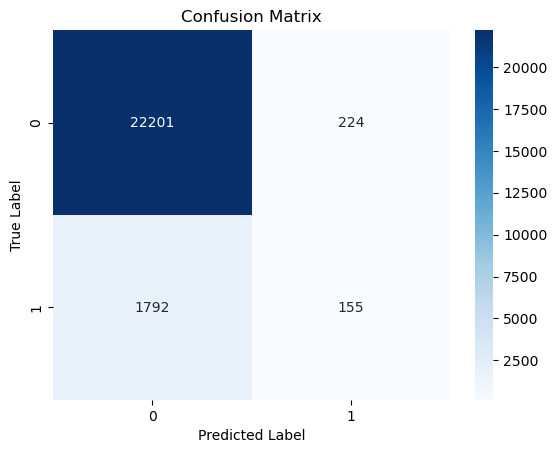

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

Text(0.5, 0, 'False Positive Rate')

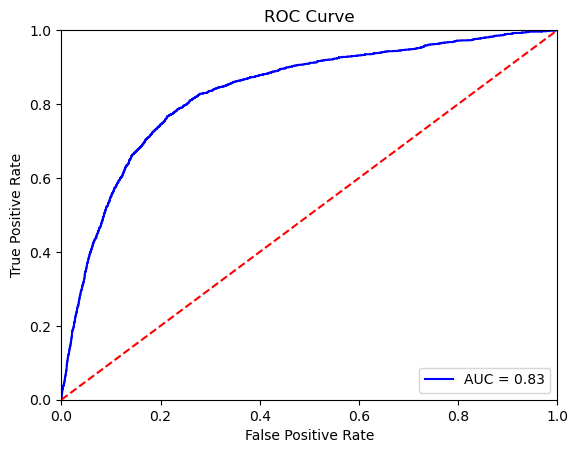

In [ ]:
probs = model.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 1.0, 'Modelin Eğitim ve Doğrulama Hatası')

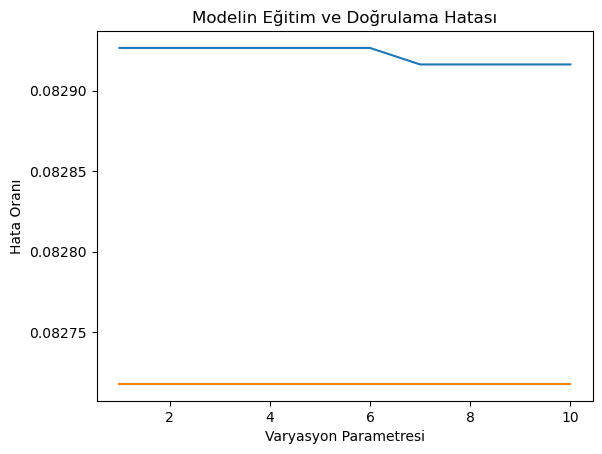

In [ ]:
train_errors = []
val_errors = []

for i in range(1, 11):
    model = LogisticRegression(max_iter=1000, C=i)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    val_pred = model.predict(X_test)

    train_error = 1 - accuracy_score(y_train, train_pred)
    val_error = 1 - accuracy_score(y_test, val_pred)

    train_errors.append(train_error)
    val_errors.append(val_error)

x = np.arange(1, 11)
plt.plot(x, train_errors, label='Eğitim Hatası')
plt.plot(x, val_errors, label='Doğrulama Hatası')
plt.xlabel('Varyasyon Parametresi')
plt.ylabel('Hata Oranı')
plt.title('Modelin Eğitim ve Doğrulama Hatası')

# LogisticRegression modelimizde aldığımız skorun geçerliliğini kanıtlayabilmek için modelimizin eğitim ve doğrulama hatasının grafiğini çıkardık
# Grafikte hata paylarını yorumladığımızda modelimizdeki tahminlemede overfitting olmadığını ortaya çıkardık

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1.0, 10.0]}#C *0,1,
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

# GridSearch modellemesiyle tuning işlemi yaparak en iyi skoru elde etmeye çalıştık
# Verdiğimiz değerler arasındaki en iyi parametrenin ne olduğunu ve skorumuzu öğrendik

Best Parameters: {'C': 0.1}
Best Score: 0.9170838273173516


In [ ]:
print('Training df:', X_train.shape)
print('Training Labels :', y_train.shape)
print('Testing df :', X_test.shape)
print('Testing Labels :', y_test.shape)

Training df: (97484, 38)
Training Labels : (97484,)
Testing df : (24372, 38)
Testing Labels : (24372,)
